In [93]:
import matplotlib.pyplot as plt
import math
import numpy as np

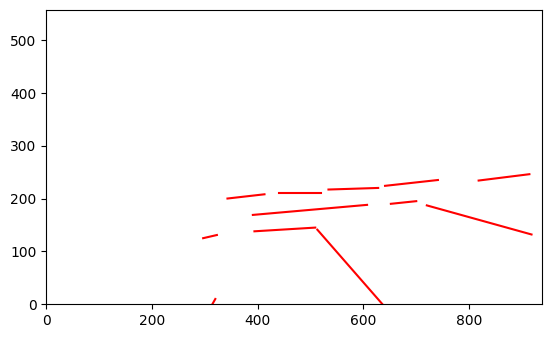

In [94]:
width = 938
height = 557

rects = [((343,280), (413, 272)), #(point1), (point2) -> (x,y)
         ((441, 269), (520,269)),
         ((534, 263), (628, 260)),
         ((641, 256), (741, 245)),
         ((818, 246), (914, 234)),
         ((391, 311), (607, 292)),
         ((652,290), (700, 285)),
         ((720, 293), (918, 348)),
         ((394,342), (509,335)),
         ((513, 339),(686, 537)),
         ((297, 355), (323, 349)),
         ((320, 470), (282, 537)),
         ]

# rects = [((13, 333), (37, 343)), #(point1), (point2) -> (x,y)
#          ((43, 349), (113, 380)),
#          ((158, 322), (192, 330)),
#          ((238, 327), (304, 319)),
#          ((416, 302), (426, 304)),
#          ((234, 304), (339, 294)),
#          ]

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Plot the two points
# ax.plot(*point1, 'bo')  # point1 in blue
# ax.plot(*point2, 'ro')  # point2 in red

# Draw a line between the two points
for rect in rects:
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [480-point1[1], 480-point2[1]], 'r-')  # line in black

# Set the x and y axis limits
ax.set_xlim(0, width)
ax.set_ylim(0, height)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Display the plot
plt.show()


In [95]:
# Lets ask for two things:
#  1. Same trend: We compare among segments that have similar trend.
#  Look at the origin its not a good idea
# 2a. De entre los que tengan la misma trend, coger pares de rectas r1 y r2
#    y comparar las pendientes que surgen al unir un extremo de r1 con los
#    extremos de r1 y r2.
# 2b. Izqr1 con Derr2 y viceversa y comparar ambas pendientes con la pendiente original **
# 2c. Izqr1 con Derr2 y calcular distancia de los otros dos extremos a la línea que queda
# 2d. Izqr1 y derr2 calcular recta y calcular distancia de puntos intermedios a esa recta



In [96]:
# 2b. Izqr1 con Derr2 y viceversa y comparar ambas pendientes con la pendiente original **

In [97]:
# # We order points the each rect such that they appear in left and then right
# def order_points(points_list):
#     ordered_points = []
#     for point1, point2 in points_list:
#         if point1[0] <= point2[0]:
#             ordered_points.append((point1, point2))
#         else:
#             ordered_points.append((point2, point1))
#     return ordered_points

# ordered_points = order_points(rects)
# print(ordered_points)


# # We order rects so that they appear from left to right
# def order_rects(ordered_points):
#     ordered_points.sort(key=lambda rect: rect[0][0])
#     return ordered_points

# ordered_rects_and_points = order_rects(ordered_points)
# print(ordered_rects_and_points)

# # Plot
# fig, ax = plt.subplots()
# fig.patch.set_facecolor('white')
# for i, rect in enumerate(ordered_rects_and_points):
#     (point1, point2) = rect
#     ax.plot([point1[0], point2[0]], [height-point1[1], height-point2[1]], 'r-')  # line in black
#     ax.text(point1[0], height-point1[1], str(i), color='blue')  # index in blue
# ax.set_xlim(0, width)
# ax.set_ylim(0, height)
# ax.set_aspect('equal')
# plt.show()


# # We compute the sscope of each rect
# def compute_trend(x1,y1,x2,y2):
#     if x2 - x1 != 0:  
#             slope = (y2 - y1) / (x2 - x1)
#     else:
#             slope = 999 #avoid division by zero
#     return slope

# def compute_trends(points_list):
#     slopes = []
#     for (x1, y1), (x2, y2) in points_list:
#         slope = compute_trend(x1,y1,x2,y2)
#         slopes.append(slope)
#     return slopes

# slopes = compute_trends(ordered_rects_and_points)
# print(slopes)

# # We group rects with similar slope, with a margin of 
# def group_similar_trends(slopes, margin=0.2):
#     groups = []
#     used_indices = set()
    
#     for i, trend in enumerate(slopes):
#         if i in used_indices:
#             continue
        
#         current_group = [i]
#         used_indices.add(i)
        
#         for j in range(i + 1, len(slopes)):
#             if j not in used_indices and abs(trend - slopes[j]) <= margin:
#                 current_group.append(j)
#                 used_indices.add(j)
        
#         groups.append(current_group)
    
#     return groups

# groups = group_similar_trends(slopes)
# print(groups)

# def group_same_line(final_groups, group, slopes, ordered_rects_and_points, margin = 0.1, margin2 = 0.1):
#     used_indices = set()

#     for i in group:
#         if i in used_indices:
#             continue
#         current_group = [i] #those in same line
#         current_slope = slopes[i]
#         used_indices.add(i)
#         (xi_l, yi_l), (xi_r, yi_r) = ordered_rects_and_points[i]

#         for j in group[i+1:]:
#             if j not in used_indices: # and abs(ordered_rects_and_points[j] - ordered_rects_and_points[i]) <= margin:
#                 (xj_l, yj_l), (xj_r, yj_r)  = ordered_rects_and_points[j]
#                 slope1 = compute_trend(xi_l,yi_l,xj_l,yj_l)
#                 slope2 = compute_trend(xi_r,yi_r,xj_r,yj_r)
#                 # print(slope, current_slope)
#                 if abs(slope1-slope2) <= margin and abs(slope1-current_slope) <= margin2 and abs(slope2-current_slope) <= margin2:
#                     current_group.append(j)
#                     used_indices.add(j)
        
#         final_groups.append(current_group) #all set of groups

#     return final_groups

# final_groups = []
# for group in groups:
#     final_groups = group_same_line(final_groups, group, slopes, ordered_rects_and_points)

# print(final_groups)


In [98]:
# 2d. Izqr1 y derr2 calcular recta y calcular distancia de puntos intermedios a esa recta

ordered_points [((343, 280), (413, 272)), ((441, 269), (520, 269)), ((534, 263), (628, 260)), ((641, 256), (741, 245)), ((818, 246), (914, 234)), ((391, 311), (607, 292)), ((652, 290), (700, 285)), ((720, 293), (918, 348)), ((394, 342), (509, 335)), ((513, 339), (686, 537)), ((297, 355), (323, 349)), ((282, 537), (320, 470))]
ordered_rects_and_points [((282, 537), (320, 470)), ((297, 355), (323, 349)), ((343, 280), (413, 272)), ((391, 311), (607, 292)), ((394, 342), (509, 335)), ((441, 269), (520, 269)), ((513, 339), (686, 537)), ((534, 263), (628, 260)), ((641, 256), (741, 245)), ((652, 290), (700, 285)), ((720, 293), (918, 348)), ((818, 246), (914, 234))]


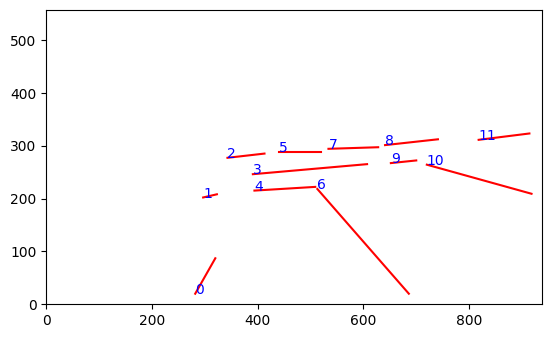

group_similar_trends [[0], [1, 2, 3, 4, 7, 8, 9, 11], [2, 1, 3, 4, 5, 7, 8, 9, 11], [3, 1, 2, 4, 5, 7, 8, 9, 11], [4, 1, 2, 3, 5, 7, 8, 9, 11], [5, 2, 3, 4, 7, 8, 9, 11], [6], [7, 1, 2, 3, 4, 5, 8, 9, 11], [8, 1, 2, 3, 4, 5, 7, 9, 11], [9, 1, 2, 3, 4, 5, 7, 8, 11], [10], [11, 1, 2, 3, 4, 5, 7, 8, 9]]
pre_final_groups [[0], [1, 4, 9], [2, 7, 8, 11], [3, 9], [4], [7], [8], [9], [11], [2, 5, 7, 8, 11], [5], [7, 11], [1, 9], [6], [2, 5, 8, 11], [2, 5, 7, 11], [5, 7], [1, 4], [3], [10], [2, 5, 7, 8]]
final_groups [[0], [1, 9], [2, 5, 7, 8, 11], [3, 9], [1, 4], [6], [10]]
[[1, 9], [1, 4]]
[[-0.17575269849238812, 406.39608035674735, 6.957012388701123], [-0.08863575275046111, 378.99806285973807, 12.844074111835067]]
1 [1, 4]
[[1, 9], [3, 9]]
[[-0.17575269849238812, 406.39608035674735, 6.957012388701123], [-0.08331989464064936, 343.4504381013815, 1.5624899209804919]]
9 [1, 9]
final_tuned_groups [[0], [2, 5, 7, 8, 11], [3, 9], [6], [10], [4], [1]]


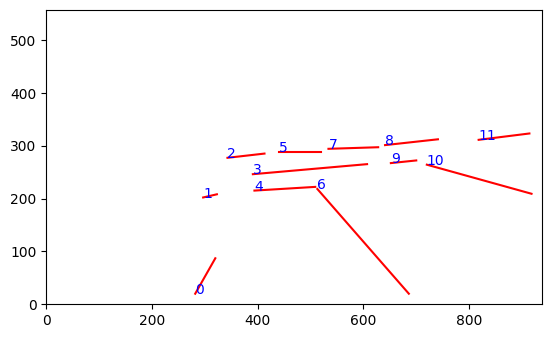

In [99]:
# We order points the each rect such that they appear in left and then right
def order_points(points_list):
    ordered_points = []
    for point1, point2 in points_list:
        if point1[0] <= point2[0]:
            ordered_points.append((point1, point2))
        else:
            ordered_points.append((point2, point1))
    return ordered_points

ordered_points = order_points(rects)
print("ordered_points",ordered_points)


# We order rects so that they appear from left to right
def order_rects(ordered_points):
    ordered_points.sort(key=lambda rect: rect[0][0])
    return ordered_points

ordered_rects_and_points = order_rects(ordered_points)
print("ordered_rects_and_points", ordered_rects_and_points)

# Plot
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for i, rect in enumerate(ordered_rects_and_points):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [height-point1[1], height-point2[1]], 'r-')  # line in black
    ax.text(point1[0], height-point1[1], str(i), color='blue')  # index in blue
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
plt.show()


# We compute the sscope of each rect
def compute_trend(x1,y1,x2,y2):
    if x2 - x1 != 0:  
            slope = (y2 - y1) / (x2 - x1)
    else:
            slope = 999 #avoid division by zero
    return slope

def compute_trends(points_list):
    slopes = []
    for (x1, y1), (x2, y2) in points_list:
        slope = compute_trend(x1,y1,x2,y2)
        slopes.append(slope)
    return slopes

slopes = compute_trends(ordered_rects_and_points)

# for i,slope in enumerate(slopes):
#     print(i, slope)

# We group rects with similar slope, with a margin of 
def group_similar_trends(slopes, margin=0.2):
    groups = []
    # used_indices = set()
    
    for i, trend in enumerate(slopes):
        # if i in used_indices:
        #     continue
        
        current_group = [i]
        # used_indices.add(i)
        
        for j in range(len(slopes)):
            if i != j:
                # print(i,j,abs(trend - slopes[j]))
                if abs(trend - slopes[j]) <= margin: #j not in used_indices and 
                    current_group.append(j)
                    # used_indices.add(j)
        # print(i, current_group)
        if current_group not in groups:
            groups.append(current_group)
    
    return groups

groups = group_similar_trends(slopes)
print("group_similar_trends",groups)


# Now that we have grouped rects with same slope, we divide them in those that belong to the same line
def distance_point_to_line_from_points(point, rect):
    x0, y0 = point
    ((x1,y1),(x2,y2)) = rect
    
    # Calculate the coefficients A, B, C of the line equation Ax + By + C = 0
    A = y2 - y1
    B = x1 - x2
    C = x2 * y1 - x1 * y2
    
    # Calculate the numerator of the distance formula
    numerator = abs(A * x0 + B * y0 + C)
    
    # Calculate the denominator of the distance formula
    denominator = math.sqrt(A**2 + B**2)
    
    # Compute the distance
    distance = numerator / denominator
    
    return distance

def group_same_line(pre_final_groups, group, slopes, ordered_rects_and_points, margin = 5):
    for i in group:
        current_group = [i] #those in same line
        (xi_l, yi_l), (xi_r, yi_r) = ordered_rects_and_points[i]

        for j in group[i+1:]:
           # if j not in used_indices: # and abs(ordered_rects_and_points[j] - ordered_rects_and_points[i]) <= margin:
            (xj_l, yj_l), (xj_r, yj_r)  = ordered_rects_and_points[j]
            dist_1 = abs(distance_point_to_line_from_points(point = (xi_r, yi_r), rect = ((xi_l, yi_l),(xj_r, yj_r))))
            dist_2 = abs(distance_point_to_line_from_points(point = (xj_l, yj_l), rect = ((xi_l, yi_l),(xj_r, yj_r)))) 
            # print(i, j, dist_1, dist_2)
            if dist_1 <= margin and dist_2 <= margin:
                current_group.append(j)

        if current_group not in pre_final_groups:
            pre_final_groups.append(current_group) #all set of groups

    return pre_final_groups

pre_final_groups = []
for group in groups:
    pre_final_groups = group_same_line(pre_final_groups, group, slopes, ordered_rects_and_points)
print("pre_final_groups", pre_final_groups)

# We make a final check to see which combination lead to less error, given preference to combinations with more elements
def least_squares_line(points):
    # Extract x and y coordinates from points
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    
    # Calculate the means of x and y
    x_mean = np.mean(x_coords)
    y_mean = np.mean(y_coords)
    
    # Calculate the slope (m) and y-intercept (b)
    numerator = np.sum((x_coords - x_mean) * (y_coords - y_mean))
    denominator = np.sum((x_coords - x_mean) ** 2)
    m = numerator / denominator
    b = y_mean - m * x_mean
    
    # Calculate the total error
    residuals = y_coords - (m * x_coords + b)
    error = np.sum(residuals ** 2)
    
    return m, b, error

def check_final_groups(pre_final_groups, ordered_rects_and_points, margin_error = 60):
    final_groups = []
    final_rects_att = []
    
    for i, rect in enumerate(ordered_rects_and_points):
        if not all(i not in sublist for sublist in final_groups): #check that i is not in any final group
            continue
        groups_of_i = []
        for group in pre_final_groups:
            if i in group:
                groups_of_i.append(group)
        
        # print(i, groups_of_i)
        ordered_groups_of_i = sorted(groups_of_i, key=len, reverse=True)
        for group in ordered_groups_of_i:
            # points_of_group = []
            # for i in group:
            #     p1, p2 = ordered_rects_and_points[i]
            #     points_of_group.append(p1)
            #     points_of_group.append(p2)
            points_of_group = sum((ordered_rects_and_points[i] for i in group), ())

            m, b, error = least_squares_line(points_of_group)
            # print(i, group, error)
            if error < margin_error:
                final_groups.append(group)
                final_rects_att.append([m,b,error])
                break
    return final_groups, final_rects_att


final_groups, final_rects_att = check_final_groups(pre_final_groups, ordered_rects_and_points)
print("final_groups", final_groups)

def final_tuned(final_groups, final_rects_att, slopes):
    # final_final_groups = []
    used_indices = set()

    for i in range(len(slopes)):
        groups_for_i = []
        props_for_i = []
        for group, prop in zip(final_groups,final_rects_att):
            if i in group:
                groups_for_i.append(group)
                props_for_i.append(prop)
        if len(groups_for_i) > 1:
            sorted_indexes = sorted(range(len(props_for_i)), key=lambda i: props_for_i[i][2])
            print(groups_for_i)
            print(props_for_i)

            for index in sorted_indexes[1:]:
                print(i,groups_for_i[index])
                final_groups.remove(groups_for_i[index])
                groups_for_i[index].remove(i)
                final_groups.append(groups_for_i[index])

    return final_groups
    
final_tuned_groups = final_tuned(final_groups, final_rects_att, slopes)
print("final_tuned_groups",final_tuned_groups)

# Plot
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for i, rect in enumerate(ordered_rects_and_points):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [height-point1[1], height-point2[1]], 'r-')  # line in black
    ax.text(point1[0], height-point1[1], str(i), color='blue')  # index in blue
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
plt.show()
